In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [122]:
data = pd.read_csv('workplace/spam.csv', encoding='latin1')

In [123]:
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5572


In [124]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']

In [125]:
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])

In [126]:
print('v2열의 유니크한 값 :',data['v2'].nunique())

v2열의 유니크한 값 : 5169


In [127]:
data.drop_duplicates(subset=['v2'], inplace=True)

In [128]:
data.groupby('v1')

In [129]:
X_data = data['v2']
y_data = data['v1']

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_data, 
                                                    y_data, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    stratify=y_data)

In [131]:
X_train


1882                     Sorry, I can't help you on this.
4948                    I am in bus on the way to calicut
4460    Thanks again for your reply today. When is ur ...
4851                               I liked your new house
201     Hello darlin ive finished college now so txt m...
                              ...                        
1971                          Enjoy ur life. . Good night
3701    Hey loverboy! I love you !! I had to tell ... ...
2809                 Mm so you asked me not to call radio
1229                      Jus ans me lar. U'll noe later.
2531    What's happening with you. Have you gotten a j...
Name: v2, Length: 4135, dtype: object

In [132]:
tokenizer = Tokenizer()

In [133]:
tokenizer
tokenizer.fit_on_texts(X_train)

In [134]:
len(tokenizer.index_word)


7821

In [135]:
tokenizer.word_counts #단어의 갯수를 파악함

OrderedDict([('sorry', 101),
             ('i', 1832),
             ("can't", 47),
             ('help', 44),
             ('you', 1644),
             ('on', 404),
             ('this', 258),
             ('am', 171),
             ('in', 664),
             ('bus', 22),
             ('the', 1003),
             ('way', 75),
             ('to', 1679),
             ('calicut', 2),
             ('thanks', 65),
             ('again', 55),
             ('for', 525),
             ('your', 519),
             ('reply', 105),
             ('today', 108),
             ('when', 221),
             ('is', 643),
             ('ur', 256),
             ('visa', 1),
             ('coming', 41),
             ('and', 754),
             ('r', 113),
             ('u', 859),
             ('still', 125),
             ('buying', 5),
             ('gucci', 1),
             ('bags', 2),
             ('my', 551),
             ('sister', 13),
             ('things', 31),
             ('are', 383),
             ('no

In [136]:
X_train_encoded = tokenizer.texts_to_sequences(X_train)
print(X_train_encoded)

[[102, 1, 210, 230, 3, 17, 39], [1, 59, 8, 427, 17, 5, 137, 2, 2326], [157, 180, 12, 13, 98, 93, 47, 9, 40, 3485, 247, 8, 7, 87, 6, 80, 1312, 5, 3486, 7, 2327, 11, 660, 306, 20, 25, 467, 708, 1028, 203, 129, 193, 800, 2328, 23, 1, 144, 71, 2, 111, 78, 43, 2, 130, 11, 800, 186, 122, 1512], [1, 1154, 13, 104, 292], [222, 622, 857, 540, 623, 22, 23, 83, 10, 47, 6, 257, 32, 6, 26, 64, 936, 407], [96, 18, 3487, 937, 76, 69, 9, 146, 183, 168, 251, 12, 3], [1, 52, 661, 248, 801, 7, 2329, 52, 1, 57, 14, 408, 468, 3, 58, 112], [171, 16, 3, 522, 1155, 12, 104, 449], [1, 450, 29, 40, 541, 134, 3488, 9, 523, 74, 14, 180], [709, 223, 115, 1, 390, 2, 89, 3, 25, 2, 89, 10, 13, 1812, 166, 14, 316, 130, 10, 1313, 24, 63, 3489, 10, 23, 157, 12, 3490], [140, 1, 1156, 4, 710, 15, 566, 17, 1314, 349, 80, 711, 624, 119, 28, 35, 1315, 41], [58, 280, 34, 31], [145, 3, 128, 1, 111, 3, 26, 252, 13, 44, 3491, 22, 2, 2330, 25, 173, 24, 32, 349, 469, 1, 26, 230, 172, 10, 52, 24, 47, 3, 31, 33, 173, 3, 20, 281], [3

In [137]:
word_to_index = tokenizer.word_index

In [138]:
word_to_index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'have': 16,
 'on': 17,
 'call': 18,
 'that': 19,
 'are': 20,
 '2': 21,
 'now': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'can': 26,
 'or': 27,
 "i'm": 28,
 'get': 29,
 'at': 30,
 'do': 31,
 'if': 32,
 'be': 33,
 'will': 34,
 'just': 35,
 'with': 36,
 'we': 37,
 'no': 38,
 'this': 39,
 'ur': 40,
 'up': 41,
 '4': 42,
 'how': 43,
 'gt': 44,
 'lt': 45,
 'go': 46,
 'when': 47,
 'from': 48,
 'what': 49,
 'ok': 50,
 'out': 51,
 'know': 52,
 'free': 53,
 'all': 54,
 'like': 55,
 'then': 56,
 'got': 57,
 'good': 58,
 'am': 59,
 'time': 60,
 'was': 61,
 'come': 62,
 'its': 63,
 'love': 64,
 'want': 65,
 'text': 66,
 'he': 67,
 'only': 68,
 'there': 69,
 'day': 70,
 'need': 71,
 'going': 72,
 'lor': 73,
 'send': 74,
 'one': 75,
 'as': 76,
 'home': 77,
 'about': 78,
 'back': 79,
 'still': 80,
 'k': 81,
 'see': 82,
 'txt': 83,
 'by': 84,
 'da'

In [139]:
tokenizer.word_counts.items()

odict_items([('sorry', 101), ('i', 1832), ("can't", 47), ('help', 44), ('you', 1644), ('on', 404), ('this', 258), ('am', 171), ('in', 664), ('bus', 22), ('the', 1003), ('way', 75), ('to', 1679), ('calicut', 2), ('thanks', 65), ('again', 55), ('for', 525), ('your', 519), ('reply', 105), ('today', 108), ('when', 221), ('is', 643), ('ur', 256), ('visa', 1), ('coming', 41), ('and', 754), ('r', 113), ('u', 859), ('still', 125), ('buying', 5), ('gucci', 1), ('bags', 2), ('my', 551), ('sister', 13), ('things', 31), ('are', 383), ('not', 336), ('easy', 20), ('uncle', 12), ('john', 7), ('also', 48), ('has', 79), ('his', 50), ('own', 10), ('bills', 2), ('so', 353), ('really', 71), ('need', 142), ('think', 93), ('about', 126), ('how', 235), ('make', 79), ('money', 52), ('later', 84), ('sha', 4), ('liked', 6), ('new', 100), ('house', 33), ('hello', 45), ('darlin', 14), ('ive', 9), ('finished', 17), ('college', 14), ('now', 360), ('txt', 119), ('me', 614), ('finish', 39), ('if', 297), ('can', 326),

In [140]:
tokenizer_over2 = Tokenizer(num_words = total_cnt-rare_cnt+1)
tokenizer_over2.fit_on_texts(X_train)


In [141]:
total_cnt = len(word_to_index)

In [142]:
threshold = 2

In [143]:
rare_cnt = 0  # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

In [144]:
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value
    if (value < threshold):
        rare_cnt = rare_cnt + 1 
        rare_freq = rare_freq + value

In [145]:
total_freq #

65145

In [146]:
rare_cnt

4337

In [147]:
rare_freq

4337

In [148]:
rare_cnt/total_cnt

0.5545326684567191

In [149]:
rare_freq/total_freq

0.0665745644331875

In [150]:
X_train_encoded

[[102, 1, 210, 230, 3, 17, 39],
 [1, 59, 8, 427, 17, 5, 137, 2, 2326],
 [157,
  180,
  12,
  13,
  98,
  93,
  47,
  9,
  40,
  3485,
  247,
  8,
  7,
  87,
  6,
  80,
  1312,
  5,
  3486,
  7,
  2327,
  11,
  660,
  306,
  20,
  25,
  467,
  708,
  1028,
  203,
  129,
  193,
  800,
  2328,
  23,
  1,
  144,
  71,
  2,
  111,
  78,
  43,
  2,
  130,
  11,
  800,
  186,
  122,
  1512],
 [1, 1154, 13, 104, 292],
 [222,
  622,
  857,
  540,
  623,
  22,
  23,
  83,
  10,
  47,
  6,
  257,
  32,
  6,
  26,
  64,
  936,
  407],
 [96, 18, 3487, 937, 76, 69, 9, 146, 183, 168, 251, 12, 3],
 [1, 52, 661, 248, 801, 7, 2329, 52, 1, 57, 14, 408, 468, 3, 58, 112],
 [171, 16, 3, 522, 1155, 12, 104, 449],
 [1, 450, 29, 40, 541, 134, 3488, 9, 523, 74, 14, 180],
 [709,
  223,
  115,
  1,
  390,
  2,
  89,
  3,
  25,
  2,
  89,
  10,
  13,
  1812,
  166,
  14,
  316,
  130,
  10,
  1313,
  24,
  63,
  3489,
  10,
  23,
  157,
  12,
  3490],
 [140,
  1,
  1156,
  4,
  710,
  15,
  566,
  17,
  1314,
  34

In [151]:
print('메일의 최대 길이 : %d' % max(len(sample) for sample in X_train_encoded))

메일의 최대 길이 : 189


In [152]:
max(len(sample) for sample in X_train_encoded)

189

In [153]:
print('메일의 평균 길이 : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))

메일의 평균 길이 : 15.754534


(array([1.390e+02, 1.361e+03, 9.540e+02, 6.010e+02, 4.370e+02, 2.840e+02,
        2.970e+02, 3.580e+02, 5.460e+02, 6.700e+01, 2.700e+01, 1.400e+01,
        1.800e+01, 1.200e+01, 5.000e+00, 1.300e+01, 8.000e+00, 4.000e+00,
        4.000e+00, 1.000e+00, 5.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  2.  ,  20.16,  38.32,  56.48,  74.64,  92.8 , 110.96, 129.12,
        147.28, 165.44, 183.6 , 201.76, 219.92, 238.08, 256.24, 274.4 ,
        292.56, 310.72, 328.88, 347.04, 365.2 , 383.36, 401.52, 419.68,
        437.84, 456.  , 474.16, 492.32, 510.48, 528.64, 546.8 , 564.96,
        583.12, 601.28, 619.44, 637.6 , 655.76, 673.92, 692.08, 710.24,
        728.4 , 

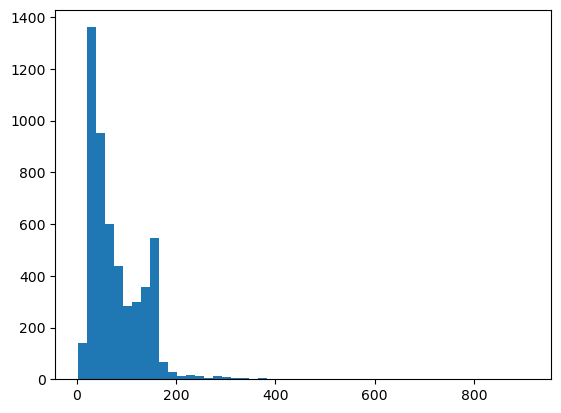

In [154]:
plt.hist([len(sample) for sample in X_data], bins=50)

In [155]:
X_train_padded = pad_sequences(X_train_encoded, maxlen =189)

In [156]:
X_train_padded

array([[   0,    0,    0, ...,    3,   17,   39],
       [   0,    0,    0, ...,  137,    2, 2326],
       [   0,    0,    0, ...,  186,  122, 1512],
       ...,
       [   0,    0,    0, ...,    2,   18, 1604],
       [   0,    0,    0, ..., 1297,  560,  122],
       [   0,    0,    0, ...,   12, 7820, 7821]])

In [157]:
X_train_padded.shape

(4135, 189)

In [158]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

In [159]:
embedding_dim = 32
hidden_units = 32

In [160]:
len(word_to_index)

7821

In [161]:
word_to_index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'have': 16,
 'on': 17,
 'call': 18,
 'that': 19,
 'are': 20,
 '2': 21,
 'now': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'can': 26,
 'or': 27,
 "i'm": 28,
 'get': 29,
 'at': 30,
 'do': 31,
 'if': 32,
 'be': 33,
 'will': 34,
 'just': 35,
 'with': 36,
 'we': 37,
 'no': 38,
 'this': 39,
 'ur': 40,
 'up': 41,
 '4': 42,
 'how': 43,
 'gt': 44,
 'lt': 45,
 'go': 46,
 'when': 47,
 'from': 48,
 'what': 49,
 'ok': 50,
 'out': 51,
 'know': 52,
 'free': 53,
 'all': 54,
 'like': 55,
 'then': 56,
 'got': 57,
 'good': 58,
 'am': 59,
 'time': 60,
 'was': 61,
 'come': 62,
 'its': 63,
 'love': 64,
 'want': 65,
 'text': 66,
 'he': 67,
 'only': 68,
 'there': 69,
 'day': 70,
 'need': 71,
 'going': 72,
 'lor': 73,
 'send': 74,
 'one': 75,
 'as': 76,
 'home': 77,
 'about': 78,
 'back': 79,
 'still': 80,
 'k': 81,
 'see': 82,
 'txt': 83,
 'by': 84,
 'da'

In [162]:
vocab_size = len(word_to_index)+1 #패딩 토크니 0번이 사용되므로 1을 더함
vocab_size

7822

In [163]:
X_train_padded[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [164]:
model = Sequential()

In [165]:
model.add(Embedding(vocab_size, embedding_dim)) #7822 -> 32차원
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation = 'sigmoid'))

In [166]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train_padded, 
                    y_train, 
                    epochs=4, 
                    batch_size=64, 
                    validation_split=0.2)

Epoch 1/4
52/52 [==============================] - 2s 25ms/step - loss: 0.3659 - acc: 0.8824 - val_loss: 0.1958 - val_acc: 0.9698
Epoch 2/4
52/52 [==============================] - 1s 22ms/step - loss: 0.1385 - acc: 0.9646 - val_loss: 0.1103 - val_acc: 0.9710
Epoch 3/4
52/52 [==============================] - 1s 22ms/step - loss: 0.0688 - acc: 0.9831 - val_loss: 0.0793 - val_acc: 0.9770
Epoch 4/4
52/52 [==============================] - 1s 22ms/step - loss: 0.0847 - acc: 0.9698 - val_loss: 0.1521 - val_acc: 0.9359


In [167]:
X_test

4183    I just really need shit before tomorrow and I ...
108     I know! Grumpy old people. My mom was like you...
5237    Someonone you know is trying to contact you vi...
1858                     Sir, i am waiting for your call.
3603            Hey morning what you come to ask:-) pa...
                              ...                        
2086                  Dude how do you like the buff wind.
5548                   No, I was trying it all weekend ;V
2254                              Ok. Me watching tv too.
3593    Do you want a New Nokia 3510i Colour Phone Del...
1174    Yay! You better not have told that to 5 other ...
Name: v2, Length: 1034, dtype: object

In [168]:
tokenizer.texts_to_sequences(X_test)

[[1, 35, 144, 71, 376, 194, 169, 7, 1, 52, 3, 619, 33, 1520, 194, 55, 314],
 [1,
  52,
  545,
  318,
  11,
  979,
  61,
  55,
  3,
  302,
  25,
  33,
  56,
  180,
  1,
  59,
  248,
  5,
  75,
  2,
  442],
 [3,
  52,
  9,
  305,
  2,
  219,
  3,
  1153,
  94,
  854,
  286,
  2,
  179,
  51,
  151,
  14,
  211,
  33,
  18,
  48,
  13,
  106,
  27,
  420],
 [364, 1, 59, 251, 12, 13, 18],
 [107, 195, 49, 3, 62, 2, 143, 408],
 [133, 8, 131, 29],
 [53,
  593,
  8,
  21,
  4,
  1021,
  893,
  2,
  224,
  1603,
  841,
  4720,
  324,
  5626,
  66,
  2,
  2,
  411,
  593,
  656,
  1197,
  83,
  461,
  209,
  727,
  396],
 [140, 24, 1, 90, 201, 1, 71, 3, 409, 445],
 [50, 269, 2, 31, 121, 276, 899, 8],
 [64, 14, 1, 65, 2, 19, 932, 1583, 36, 909],
 [410, 1, 16, 4, 104, 3252, 22],
 [223,
  50,
  1,
  4825,
  8,
  2,
  143,
  705,
  170,
  7,
  95,
  178,
  1207,
  114,
  8,
  20,
  3,
  187,
  614,
  39,
  397,
  828],
 [1, 65, 711, 150, 35, 3831, 7],
 [59, 558, 34, 235, 33, 189, 54, 5, 261],
 [145,

In [169]:
X_test_encoded=tokenizer.texts_to_sequences(X_test)
X_test_encoded = pad_sequences(X_test_encoded, maxlen =189)

In [170]:
X_test_encoded

array([[  0,   0,   0, ..., 194,  55, 314],
       [  0,   0,   0, ...,  75,   2, 442],
       [  0,   0,   0, ..., 106,  27, 420],
       ...,
       [  0,   0,   0, ..., 399, 483, 119],
       [  0,   0,   0, ...,  27,  18, 725],
       [  0,   0,   0, ..., 249, 661, 761]])

In [171]:
X_test_encoded.shape

(1034, 189)

In [172]:
model.predict(X_train_encoded[0])

ValueError: in user code:

    File "C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2416, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2401, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2389, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2357, in predict_step
        return self(x, training=False)
    File "C:\Users\user\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_1' (type Sequential).
    
    Input 0 of layer "simple_rnn_3" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 32)
    
    Call arguments received by layer 'sequential_1' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=False
      • mask=None


In [ ]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen =189)

In [ ]:
"""
팀원별 메일 제목 / 분류결과 데이터셋 구성\d
- 스팸메일 / 햄 메일 분류기\d
- 도착메일 -> 누구의 메일일까? 자동분류"""

In [ ]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

In [ ]:
X_test_encoded
X_test_encoded.shape

In [ ]:
X_test[2]

In [303]:
from konlpy.tag import Okt

In [304]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [305]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt",
                           filename="ratings_total.txt")

('ratings_total.txt', <http.client.HTTPMessage at 0x1e4acda3dd0>)

In [306]:
total_data = pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])

In [307]:
total_data = total_data.head(20000)

In [308]:
total_data

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
...,...,...
19995,1,중간이 구겨져서 왔네요. 넓은데 붙이려고 샀는데 쓰지도 못해요.
19996,5,싸이즈가없어서 한치수큰걸샀는데 역시 편하고좋아요
19997,1,포장 상태보고 바로 반품했어야 했는데 귀찮네요 리뷰를 잘 봤어야 했는디
19998,1,유통기간 너무짧아요


In [309]:
total_data['label']=np.select([total_data.ratings>3], [1], default=0)
total_data['ratings'].nunique()
total_data['reviews'].nunique()

19999

In [310]:
total_data.drop_duplicates(subset=['reviews'], inplace=True)
train_data, test_data = train_test_split(total_data, test_size = 0.25, random_state = 42)

In [311]:
train_data['reviews']=train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

C:\Users\user\AppData\Local\Temp\ipykernel_17040\1758716020.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['reviews']=train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [312]:
train_data['reviews']

5514                                여름보다는 추운계절에어울릴 무거운향입니다
1266                                               원도 아까워요
5864            무료체험 싸고 귀여운데 케이스랑 같이끼면 조작안돼서 둘 중 하나 포기해야해요
15866              상품불량이 있네요 가격은 좋은데말이죠 신경써서 배송해주시면 좋았을텐데요
12893                                 향은 좋은데 지속성이 많이 떨어지는듯
                               ...                        
11285                      조잡의 극치 입니다 돈 더받고 좋은제품으로 판매 바랍니다
11965                                        그냥ㄱ 량ㅎㅇ퉁ㅇ오어우에
5390     핸드폰으로 주문하다보니 한자 입력이 어려운데 한글로 문구를 적었어도 삼가 고인의 명...
860                                    사이즈도 정사이즈인거같고 핏도이뻐요
15796                                   솔직히 별로라 다른거 사서 쓸게요
Name: reviews, Length: 14999, dtype: object

In [313]:
test_data.drop_duplicates(subset=['reviews'], inplace=True)
test_data['reviews']=test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data['reviews'].replace("", np.nan, inplace=True)
test_data = test_data.dropna()

C:\Users\user\AppData\Local\Temp\ipykernel_17040\2660855866.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['reviews']=test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [314]:
len(test_data)

5000

In [315]:
okt=Okt()

In [316]:
okt.pos('배송도 빠르네요 가격대비 좋은것 같아요 첨에는 힘들어하나 조금 지나니 잘 하네요')

[('배송', 'Noun'),
 ('도', 'Josa'),
 ('빠르네요', 'Adjective'),
 ('가격', 'Noun'),
 ('대비', 'Noun'),
 ('좋은', 'Adjective'),
 ('것', 'Noun'),
 ('같아요', 'Adjective'),
 ('첨', 'Noun'),
 ('에는', 'Josa'),
 ('힘들어하나', 'Adjective'),
 ('조금', 'Noun'),
 ('지나니', 'Verb'),
 ('잘', 'Verb'),
 ('하네요', 'Verb')]

In [317]:
okt.pos(train_data['reviews'])

AssertionError: phrase input should be string, not <class 'pandas.core.series.Series'>

In [318]:
train_data['NV'] = train_data['reviews']

In [319]:
train_data

,ratings,reviews,label,NV
5514,2,여름보다는 추운계절에어울릴 무거운향입니다,0,여름보다는 추운계절에어울릴 무거운향입니다
1266,1,원도 아까워요,0,원도 아까워요
5864,2,무료체험 싸고 귀여운데 케이스랑 같이끼면 조작안돼서 둘 중 하나 포기해야해요,0,무료체험 싸고 귀여운데 케이스랑 같이끼면 조작안돼서 둘 중 하나 포기해야해요
15866,2,상품불량이 있네요 가격은 좋은데말이죠 신경써서 배송해주시면 좋았을텐데요,0,상품불량이 있네요 가격은 좋은데말이죠 신경써서 배송해주시면 좋았을텐데요
12893,2,향은 좋은데 지속성이 많이 떨어지는듯,0,향은 좋은데 지속성이 많이 떨어지는듯
...,...,...,...,...
11285,2,조잡의 극치 입니다 돈 더받고 좋은제품으로 판매 바랍니다,0,조잡의 극치 입니다 돈 더받고 좋은제품으로 판매 바랍니다
11965,2,그냥ㄱ 량ㅎㅇ퉁ㅇ오어우에,0,그냥ㄱ 량ㅎㅇ퉁ㅇ오어우에
5390,1,핸드폰으로 주문하다보니 한자 입력이 어려운데 한글로 문구를 적었어도 삼가 고인의 명...,0,핸드폰으로 주문하다보니 한자 입력이 어려운데 한글로 문구를 적었어도 삼가 고인의 명...
860,5,사이즈도 정사이즈인거같고 핏도이뻐요,1,사이즈도 정사이즈인거같고 핏도이뻐요


In [320]:
okt.pos(train_data['NV'][1])

[('택배', 'Noun'),
 ('가', 'Josa'),
 ('엉망', 'Noun'),
 ('이네', 'Josa'),
 ('용', 'Noun'),
 ('저희', 'Modifier'),
 ('집', 'Noun'),
 ('밑', 'Noun'),
 ('에', 'Josa'),
 ('층', 'Noun'),
 ('에', 'Josa'),
 ('말', 'Noun'),
 ('도', 'Josa'),
 ('없이', 'Adverb'),
 ('놔두고가고', 'Verb')]

In [321]:
okt.morphs(train_data['NV'][1])

['택배',
 '가',
 '엉망',
 '이네',
 '용',
 '저희',
 '집',
 '밑',
 '에',
 '층',
 '에',
 '말',
 '도',
 '없이',
 '놔두고가고']

In [322]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', 
             '하', '고', '을', '를', '인', '듯', '과', '와', '네', 
             '들', '듯', '지', '임', '게']

In [323]:
train_data['tokenized']=train_data['reviews'].apply(okt.morphs)
train_data['tokenized']=train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [327]:
from collections import Counter

In [328]:
list = ['Hello', 'HI', 'How', 'When', 'Where', 'Hello']

In [329]:
Counter(list)

Counter({'Hello': 2, 'HI': 1, 'How': 1, 'When': 1, 'Where': 1})

In [330]:
negative_words = np.hstack(train_data[train_data.label==0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label==1]['tokenized'].values)

In [331]:
negative_word_count = Counter(negative_words)
positive_word_count = Counter(positive_words)

In [332]:
negative_word_count.most_common(20)

[('너무', 1292),
 ('요', 1210),
 ('안', 1154),
 ('배송', 965),
 ('그냥', 872),
 ('잘', 812),
 ('로', 614),
 ('했는데', 607),
 ('으로', 562),
 ('못', 546),
 ('별로', 543),
 ('구매', 541),
 ('제품', 534),
 ('좀', 519),
 ('사용', 515),
 ('생각', 509),
 ('ㅠㅠ', 503),
 ('하고', 498),
 ('보다', 458),
 ('개', 437)]

In [333]:
positive_word_count.most_common(20)

[('잘', 1520),
 ('좋아요', 1374),
 ('배송', 1191),
 ('재구매', 903),
 ('너무', 900),
 ('구매', 692),
 ('요', 626),
 ('사용', 550),
 ('가격', 487),
 ('같아요', 452),
 ('으로', 447),
 ('좋네요', 430),
 ('로', 429),
 ('제품', 405),
 ('주문', 394),
 ('빠르고', 388),
 ('보다', 378),
 ('입니다', 374),
 ('더', 337),
 ('생각', 336)]

긍정 리뷰의 평균 길이 : 10.893045239702904
부정 리뷰의 평균 길이 : 14.335659731366869


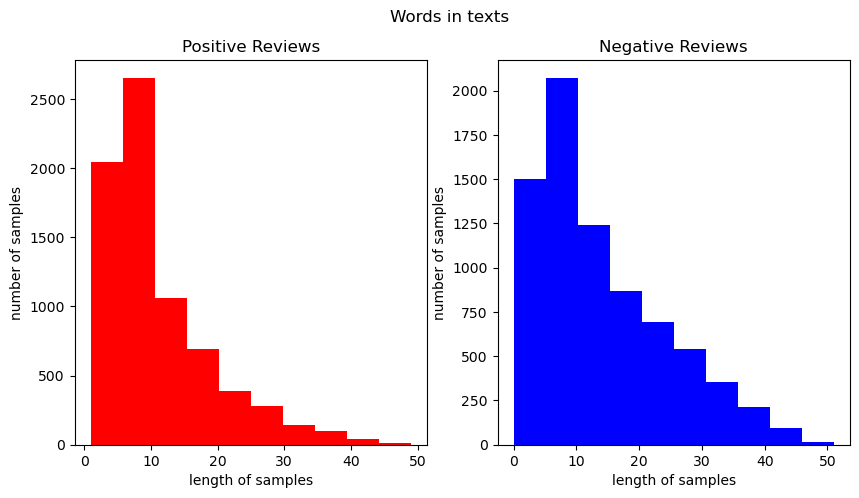

In [334]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [335]:
test_data['tokenized'] = test_data['reviews'].apply(okt.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [342]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

In [343]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [344]:
tokenizer.word_index

{'잘': 1,
 '너무': 2,
 '배송': 3,
 '요': 4,
 '좋아요': 5,
 '안': 6,
 '재구매': 7,
 '구매': 8,
 '사용': 9,
 '로': 10,
 '으로': 11,
 '그냥': 12,
 '했는데': 13,
 '제품': 14,
 '생각': 15,
 '보다': 16,
 '하고': 17,
 '가격': 18,
 '좀': 19,
 '같아요': 20,
 '주문': 21,
 '입니다': 22,
 '맛': 23,
 '못': 24,
 '때': 25,
 '해서': 26,
 '많이': 27,
 '더': 28,
 'ㅠㅠ': 29,
 '별로': 30,
 '만': 31,
 '사이즈': 32,
 '것': 33,
 '개': 34,
 '포장': 35,
 '합니다': 36,
 '에서': 37,
 '서': 38,
 '상품': 39,
 '거': 40,
 '좋네요': 41,
 '정말': 42,
 '냄새': 43,
 '다른': 44,
 '빠르고': 45,
 '부분': 46,
 'ㅠ': 47,
 '했어요': 48,
 '이라': 49,
 '하나': 50,
 '제': 51,
 '인데': 52,
 '나': 53,
 '샀는데': 54,
 '조금': 55,
 '반품': 56,
 '진짜': 57,
 '저': 58,
 'ㅎㅎ': 59,
 '넘': 60,
 '좋습니다': 61,
 '두': 62,
 '구입': 63,
 '아주': 64,
 '또': 65,
 '좋은': 66,
 '할': 67,
 '맘': 68,
 '딱': 69,
 '아이': 70,
 '완전': 71,
 '느낌': 72,
 '만족합니다': 73,
 '좋고': 74,
 '정도': 75,
 '아직': 76,
 '사진': 77,
 '엄청': 78,
 '중': 79,
 '해': 80,
 '라': 81,
 '감사합니다': 82,
 '다시': 83,
 '있어요': 84,
 '않고': 85,
 'ㅜㅜ': 86,
 '처음': 87,
 '그': 88,
 '디자인': 89,
 '효과': 90,
 '면': 91,
 '용': 92,
 '써': 

In [345]:
threshold = 2
total_cnt = len(tokenizer.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 25443
등장 빈도가 1번 이하인 희귀 단어의 수: 14817
단어 집합에서 희귀 단어의 비율: 58.2360570687419
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 7.817842218564011


In [346]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 10628


In [347]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)

In [348]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [349]:
print(tokenizer.word_index)

{'OOV': 1, '잘': 2, '너무': 3, '배송': 4, '요': 5, '좋아요': 6, '안': 7, '재구매': 8, '구매': 9, '사용': 10, '로': 11, '으로': 12, '그냥': 13, '했는데': 14, '제품': 15, '생각': 16, '보다': 17, '하고': 18, '가격': 19, '좀': 20, '같아요': 21, '주문': 22, '입니다': 23, '맛': 24, '못': 25, '때': 26, '해서': 27, '많이': 28, '더': 29, 'ㅠㅠ': 30, '별로': 31, '만': 32, '사이즈': 33, '것': 34, '개': 35, '포장': 36, '합니다': 37, '에서': 38, '서': 39, '상품': 40, '거': 41, '좋네요': 42, '정말': 43, '냄새': 44, '다른': 45, '빠르고': 46, '부분': 47, 'ㅠ': 48, '했어요': 49, '이라': 50, '하나': 51, '제': 52, '인데': 53, '나': 54, '샀는데': 55, '조금': 56, '반품': 57, '진짜': 58, '저': 59, 'ㅎㅎ': 60, '넘': 61, '좋습니다': 62, '두': 63, '구입': 64, '아주': 65, '또': 66, '좋은': 67, '할': 68, '맘': 69, '딱': 70, '아이': 71, '완전': 72, '느낌': 73, '만족합니다': 74, '좋고': 75, '정도': 76, '아직': 77, '사진': 78, '엄청': 79, '중': 80, '해': 81, '라': 82, '감사합니다': 83, '다시': 84, '있어요': 85, '않고': 86, 'ㅜㅜ': 87, '처음': 88, '그': 89, '디자인': 90, '효과': 91, '면': 92, '용': 93, '써': 94, '빠른': 95, '색상': 96, '일': 97, '전': 98, '크기': 99, '하기': 100, '보고': 101, '선물': 1

리뷰의 최대 길이 : 51
리뷰의 평균 길이 : 12.636042402826854


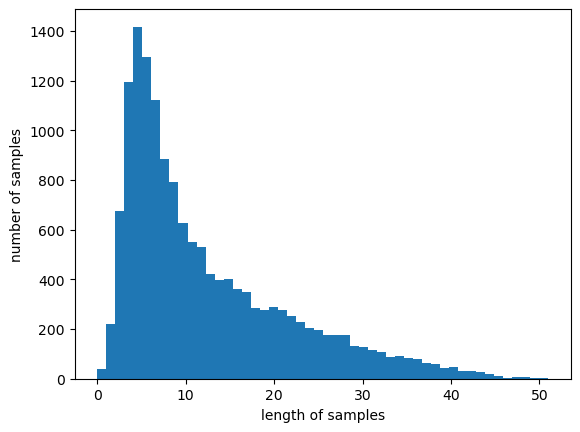

In [350]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [351]:
X_train = pad_sequences(X_train, maxlen = 51)
X_test = pad_sequences(X_test, maxlen = 51)

In [352]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [353]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [354]:
es = EarlyStopping(monitor='val_loss', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [355]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
199/200 [============================>.] - ETA: 0s - loss: 0.5008 - acc: 0.7603
Epoch 1: val_acc improved from -inf to 0.86300, saving model to best_model.h5
200/200 [==============================] - 11s 44ms/step - loss: 0.4998 - acc: 0.7610 - val_loss: 0.3513 - val_acc: 0.8630
Epoch 2/15
  3/200 [..............................] - ETA: 7s - loss: 0.3203 - acc: 0.8889

C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


199/200 [============================>.] - ETA: 0s - loss: 0.2900 - acc: 0.8902
Epoch 2: val_acc improved from 0.86300 to 0.88033, saving model to best_model.h5
200/200 [==============================] - 8s 41ms/step - loss: 0.2903 - acc: 0.8898 - val_loss: 0.3127 - val_acc: 0.8803
Epoch 3/15
199/200 [============================>.] - ETA: 0s - loss: 0.2329 - acc: 0.9164
Epoch 3: val_acc did not improve from 0.88033
200/200 [==============================] - 8s 40ms/step - loss: 0.2334 - acc: 0.9162 - val_loss: 0.3227 - val_acc: 0.8717
Epoch 4/15
199/200 [============================>.] - ETA: 0s - loss: 0.2054 - acc: 0.9301
Epoch 4: val_acc did not improve from 0.88033
200/200 [==============================] - 8s 41ms/step - loss: 0.2049 - acc: 0.9302 - val_loss: 0.3184 - val_acc: 0.8777
Epoch 5/15
199/200 [============================>.] - ETA: 0s - loss: 0.1803 - acc: 0.9405
Epoch 5: val_acc did not improve from 0.88033
200/200 [==============================] - 8s 41ms/step - loss

In [356]:
loaded_model = load_model('best_model.h5')

In [357]:
loaded_model.evaluate(X_test, y_test)

157/157 [==============================] - 2s 11ms/step - loss: 0.3036 - acc: 0.8826


[0.30358749628067017, 0.8826000094413757]

In [358]:
def sentiment_predict(new_sentence):
    #구현
    pass

SyntaxError: incomplete input (560685080.py, line 1)

In [ ]:
sentiment_predict('이 제품 너무 좋은데요. 정말 좋아요. 강추합니다.')
sentiment_predict('이것도 상품인가요? 정말 화가 납니다. 분노가 치밀어요. 개짜증납니다')